# MNIST Classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn


### Ingesting Data

In [3]:
data = pd.read_csv('MNIST_train.csv')
data1 = pd.read_csv('MNIST_test.csv')
data.head()
data1.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X= data.to_numpy()
X1= data1.to_numpy()

In [35]:
y=X[:,2]
X=X[:,3:]
y1=X1[:,2]
X1=X1[:,3:]

### Checking if labels are the same as image

In [36]:
X[0,:].shape

(784,)

In [37]:
y[0]

5

In [38]:
784**.5


28.0

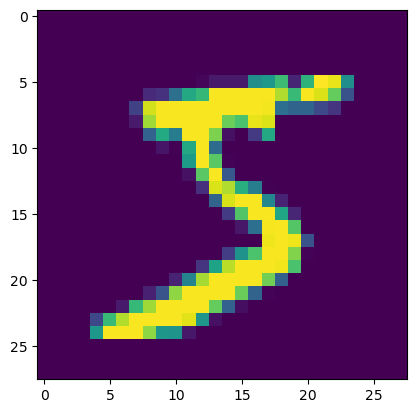

In [40]:
plt.imshow(X[0,:].reshape(28,28))

### Accuracy Metrics

In [42]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [56]:
def precision_score(y_true, y_pred):
    
   
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    
    unique_labels = np.unique(y_true)
    precisions = []
    for label in unique_labels:
        true_positives = np.sum((y_true == label) & (y_pred == label))
        false_positives = np.sum((y_true != label) & (y_pred == label))
        precision = true_positives / (true_positives + false_positives)
        precisions.append(precision)
    
    
    precision = np.mean(precisions)
    
    return precision


### Gausian Naive Bayes Classifier

In [60]:
class GaussNB():
    
    def fit(self, X, y, epsilon = 1080):
        
        self.likelihood = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            
            X_k = X[y==k,:]
            
            self.likelihood[k] = {'mean': X_k.mean(axis=0), 'cov': X_k.var(axis=0)+epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        
        N,D =X.shape
        
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihood.items():
            
            #Bayes theorem computation
            
            P_hat[:, k] = mvn.logpdf(X, l['mean'],.5*l['cov'])+np.log(self.priors[k])
            
        return P_hat.argmax(axis=1)

In [61]:
gnb=GaussNB()

In [62]:
gnb.fit(X,y)

In [63]:
y_hat = gnb.predict(X1)

In [64]:
accuracy(y1, y_hat)

0.8454

In [65]:
precision_score(y1, y_hat)

0.8504237903400608

### Non-Naive Gaussian Bayes Classifier

In [47]:
class GaussBayes:
    def fit(self, X, y, epsilon=1080):
        self.likelihood = dict()
        self.priors = dict()
        
        
        
        self.K =set(y.astype(int))
        
        for k in self.K:
            
            X_k = X[y==k,:]
            
            N_k, D = X_k.shape
            
            mu_k = X_k.mean(axis=0)
            
            self.likelihood[k] ={'mean': X_k.mean(axis=0), 'cov':(1/(N_k-1))*np.matmul((X_k-mu_k).T,(X_k-mu_k))+epsilon*np.identity(D)}
            
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X, eff=1/2**.5):
        
        N, D = X.shape
        
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihood.items():
            
            #Bayes theorem computation
            
            P_hat[:, k] = mvn.logpdf(X, l['mean'],eff*l['cov'])+np.log(self.priors[k])
            
        return P_hat.argmax(axis=1) 

In [48]:
gb = GaussBayes()

In [49]:
gb.fit(X,y)

In [50]:
y_hat2 = gb.predict(X1)

In [51]:
accuracy(y1, y_hat2)

0.9541

In [58]:
precision_score(y1, y_hat2)

0.9548679169140997

### K-Nearest Neighbour Classifier

In [52]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X, K, epsilon =1e-1):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt])+epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
        return y_hat

In [53]:
knn = KNNClassifier()
knn.fit(X,y)

In [54]:
y_hat3 = knn.predict(X1, 2)

In [55]:
accuracy(y1, y_hat3)

0.9691

In [59]:
precision_score(y1, y_hat3)

0.9691476332561566